In [1]:
# This notebook is used to test the draculab's topology class 
# By Sergio Verduzco Flores                August 2017

from draculab import *
from matplotlib import pyplot as plt
import time

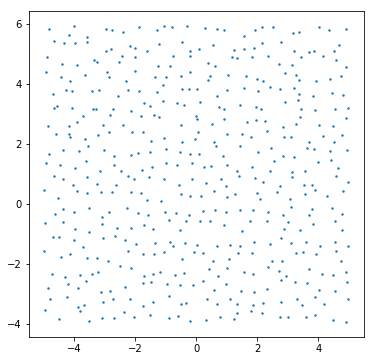

In [2]:
""" This cell is meant to test the create_group method with the 'sheet' shape and 'grid' arrangement """
topo = topology()

# Create network
net_params = {'min_delay' : 0.2, 'min_buff_size' : 4 } # parameter dictionary for the network
net = network(net_params)

# Create group of units
unit_pars = { 'init_val' : 0.5, 'function' : lambda x:None, 'type' : unit_types.source } 
geom = { 'shape':'sheet', 'extent':[10.,10.], 'center':[0.,1.], 'arrangement':'grid', 
         'rows':20, 'columns':24, 'jitter' : 0.2 }
ids = topo.create_group(net, geom, unit_pars)
xvals = [ u.coordinates[0] for u in net.units ]
yvals = [ u.coordinates[1] for u in net.units ]

figg = plt.figure(figsize=(6,6))
plt.scatter(xvals, yvals, s=2.)
plt.show()

In [3]:
""" This cell tessts the topo_connect method continuing with the network in the previous cell. """

# create the spec dictionaries
conn_spec = {'connection_type' : 'divergent',
             #'number_of_connections' : 20,
             #'mask' : {'rectangular':{'lower_left':[-1.,-4.], 'upper_right':[3.,-1.5]}}, 
             'mask' : {"annular" : {"inner_radius": 2., 'outer_radius':5.}},
             #'mask' : {'circular' : {'radius' : 3}},
             'kernel' : 1., 
             #'kernel' : {'gaussian':{'p_center':.2, 'sigma':3.}},
             #'kernel' : {'linear' : {'c' : 1., 'a' : .3}},
             'delays' : {'linear' : {'c':0.1, 'a':0.1}},
             'weights' : {'linear' : {'c':5., 'a':1.}},
             'edge_wrap' : True,
             'boundary' : {'center' : geom['center'], 'extent' : geom['extent']},
            }
syn_spec = {'type' : synapse_types.static, 'init_w' : 0.2 }

# connect
topo.topo_connect(net, ids, ids, conn_spec, syn_spec)

<IPython.core.display.Javascript object>


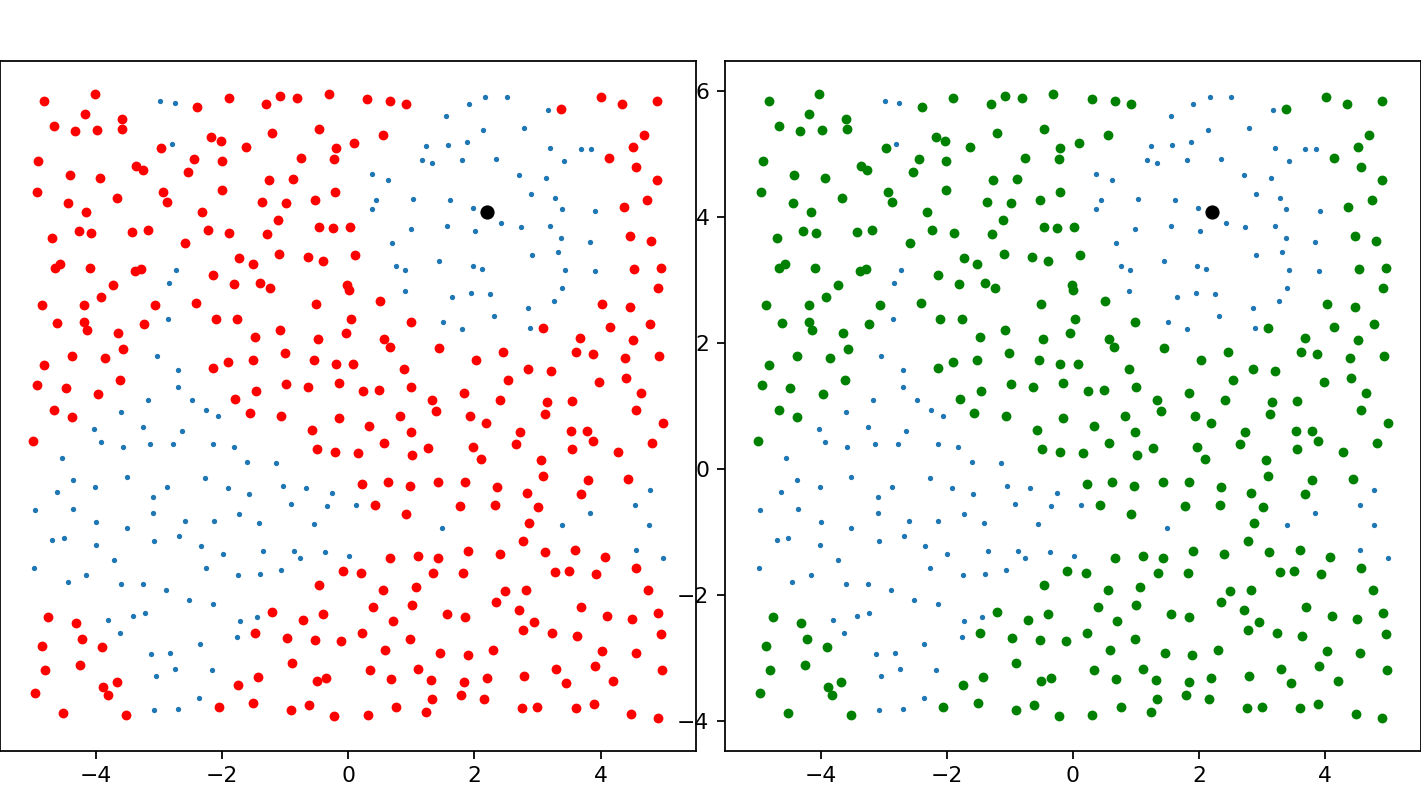

In [4]:
-